# Autothresholding in Julia

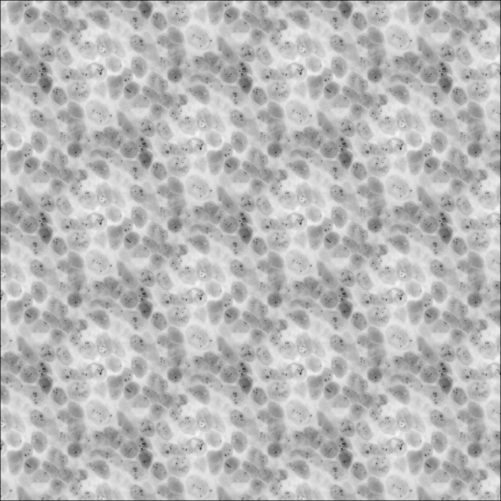

In [51]:
using Images
using IJulia
using Plots
using Interpolations
function resize(img)
    imresize(img, (300, 300), method=Interpolations.Constant())
end

Image = Matrix{Gray{Float32}}

img = load("./images/input/cells4000.jpg")
img = Gray{Float32}.(img)

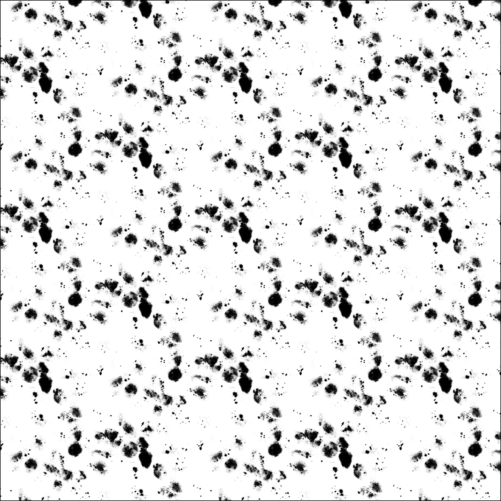

In [58]:
function thresholding(img::Image, thresh)::Image
    (h,w) = size(img)
    output = Gray.(zeros(Float32,h,w))
    for i in 1:h 
        for j in 1:w
            pix = 
            if img[i,j] > thresh
                output[i,j] = 1.0
            else
                output[i,j] = 0.0
            end
        end
    end
    return output
    
end
thresholding(img, 0.6)

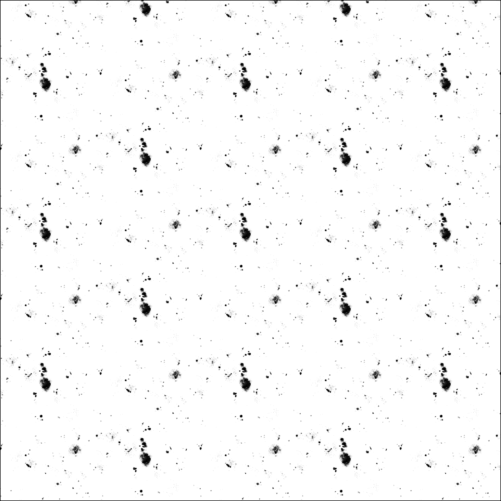

In [33]:
function min_max_thresholding(img::Image)::Image
    min = Inf
    max = -Inf
    (h,w) = size(img)
    for i in 1:h 
        for j in 1:w
            pix = img[i,j]
            if pix > max
                max = pix
            end
            if pix < min
                min = pix
            end
        end
    end
    thresh = (max-min) / 2
    thresholding(img, thresh)
end

min_max_thresholding(img)



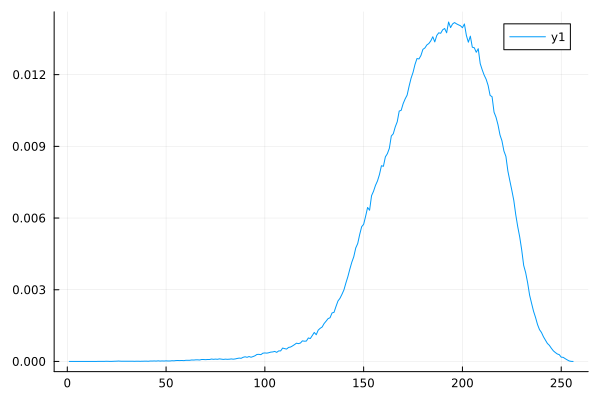

In [34]:
using Plots
function hist(img::Image)::Array{Float32}
    buckets = zeros(Int, 256)
    (h,w) = size(img)
    for i in 1:h 
        for j in 1:w
            index = Int(ceil(img[i,j] * 256 + eps(Float32) ))
            buckets[index]+=1
        end
    end
    return map(buckets) do x
        x/(h*w)
    end
end


function plothist(hist::Array{Float32})
    plot(1:length(hist), hist)
end

plothist(hist(img))

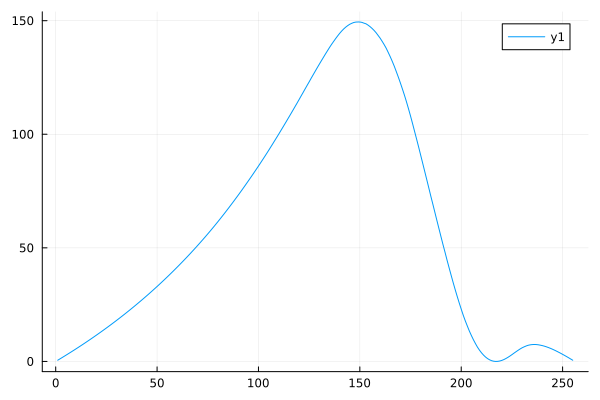

In [41]:
function otsu_between_variances(hist::Array{Float32})
    mean = sum(collect(1:length(hist)) .* hist) / length(hist)
    between_variances = zeros(length(hist)-1)
    for i in 1:(length(hist)-1)
        # all pixels <= i belong to one category, > i to the other
        # calculate between class variance:
        sec1 = range(1,i)
        sec2 = range(i+1,length(hist))
        sec1_mean = sum(collect(sec1) .* hist[sec1]) / length(sec1)  
        sec2_mean = sum(collect(sec2) .* hist[sec2]) / length(sec2)
        between_variances[i] = (sec1_mean-mean)^2 * length(sec1) + (sec2_mean -mean)^2 * length(sec2)
    end
    between_variances
end

plot(otsu_between_variances(hist(img)))

Otsu using value 149/255 as threshold

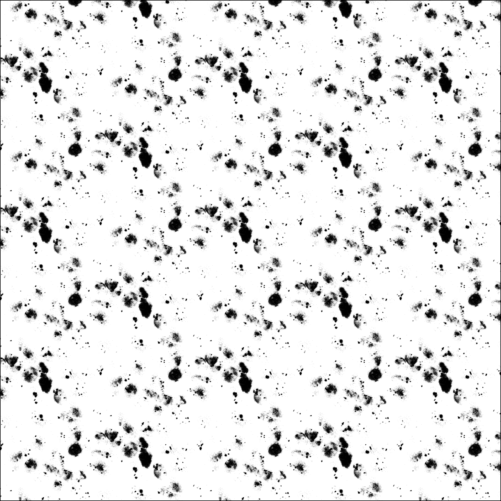

In [60]:
function otsu_thresholding(img::Image)::Image
    _, index = findmax(otsu_between_variances(hist(img)))
    print("Otsu using value $(index)/255 as threshold")
    thresholding(img, Float32(index) / 256.0)
end
otsu_thresholding(img)